Используем уже известный нам набор данных "International Airline Passengers" (количество международных авиапассажиров за месяц). Этот датасет доступен в интернете и часто используется для демонстрации методов анализа временных рядов.
В этом задании мы создадим модель LSTM для предсказания количества пассажиров на основе предыдущих данных.

### Задание: Прогнозирование временного ряда с использованием LSTM

#### Цель
Создать и обучить модель LSTM для предсказания количества международных авиапассажиров на основе временного ряда.

#### Теория

- **Модель LSTM** может использоваться для предсказания последовательности значений на основе предыдущих наблюдений. Она хорошо справляется с задачами, где важно учитывать зависимость данных во времени.

#### Описание кода

1. **Выбор и загрузка набора данных:**  
   Мы используем набор данных "International Airline Passengers", который можно загрузить с помощью URL.

2. **Предобработка данных:**  
   - Нормализация данных.
   - Создание обучающих и тестовых выборок.
   - Формирование временных окон для данных.

3. **Создание и обучение модели:**  
   - Построение модели LSTM для предсказания временного ряда.
   - Обучиние модели на тренировочных данных.

4. **Оценка модели и визуализация результатов:**  
   - Оценим модель на тестовых данных.
   - Визуализируем реальные и предсказанные значения.


### Домашнее задание

1. **Улучшение модели:**  
   - Измените архитектуру модели, добавив больше слоев или изменив количество нейронов.
   - Попробуйте различные гиперпараметры, такие как количество эпох, размер батча и функции активации.

2. **Анализ результатов:**  
   - Оцените модель с использованием метрик, таких как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE).
   - Исследуйте влияние различных временных окон на качество прогноза.
   
3. **Отправьте ссылку на ваш блокнот в Colab преподавателю.**

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0202
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0111
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0128
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0049
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - 

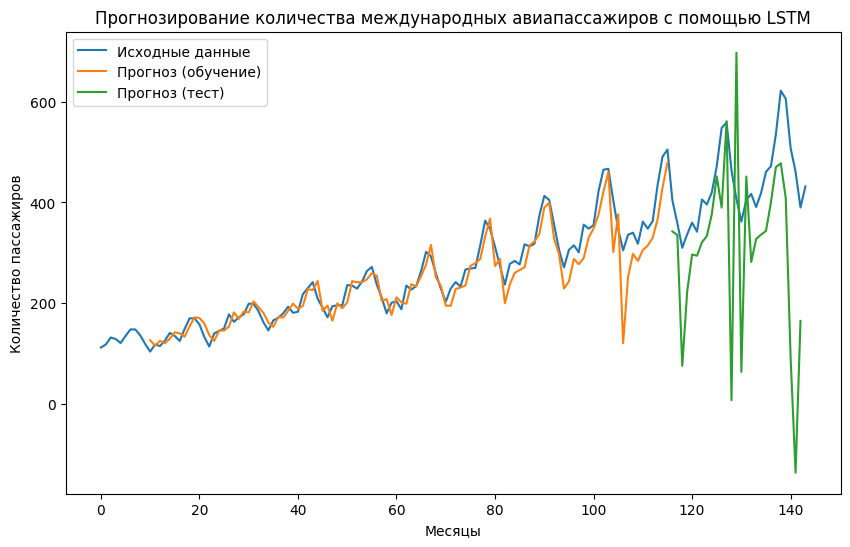

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
import requests
import io

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Просмотр первых строк данных
print(data.head())

# Преобразование данных
data = data['Passengers'].values.astype(float)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Создание обучающих и тестовых выборок
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Разделение на обучающие и тестовые данные
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Изменение формы данных для LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Построение модели LSTM
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Предсказание и оценка модели
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Обратное преобразование предсказанных значений к исходной шкале
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')

# Построение прогноза для обучающей выборки
plt.plot(np.arange(time_step, train_size + time_step), train_predict, label='Прогноз (обучение)')

# Построение прогноза для тестовой выборки
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(test_predict)), test_predict, label='Прогноз (тест)')

plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Количество пассажиров')
plt.title('Прогнозирование количества международных авиапассажиров с помощью LSTM')
plt.show()


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0205
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0110
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0089
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0090
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0084
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

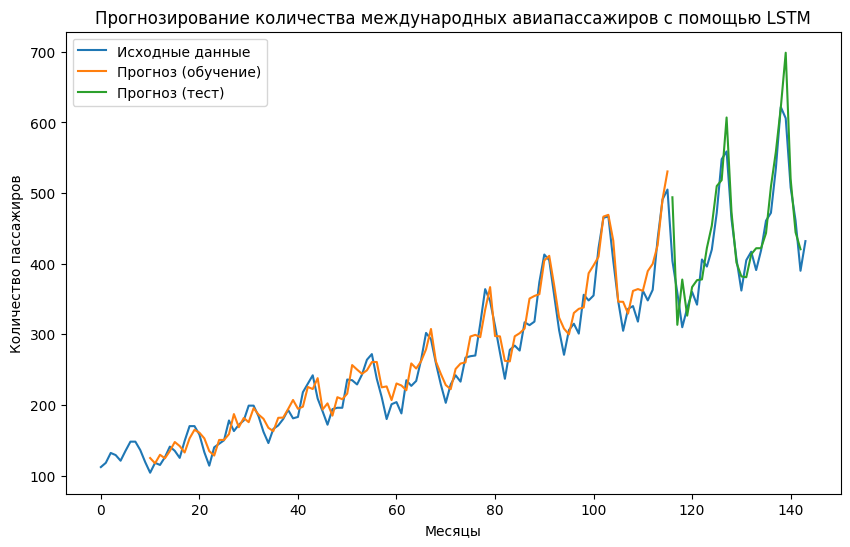

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
import requests
import io

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Просмотр первых строк данных
print(data.head())

# Преобразование данных
data = data['Passengers'].values.astype(float)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Создание обучающих и тестовых выборок
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Разделение на обучающие и тестовые данные
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Изменение формы данных для LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Построение модели LSTM
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Предсказание и оценка модели
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Обратное преобразование предсказанных значений к исходной шкале
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')

# Построение прогноза для обучающей выборки
plt.plot(np.arange(time_step, train_size + time_step), train_predict, label='Прогноз (обучение)')

# Построение прогноза для тестовой выборки
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(test_predict)), test_predict, label='Прогноз (тест)')

plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Количество пассажиров')
plt.title('Прогнозирование количества международных авиапассажиров с помощью LSTM')
plt.show()


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0405
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0110
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0127
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0108
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0064
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0088
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0063
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0046
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0073
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0040
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0050
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0027
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s

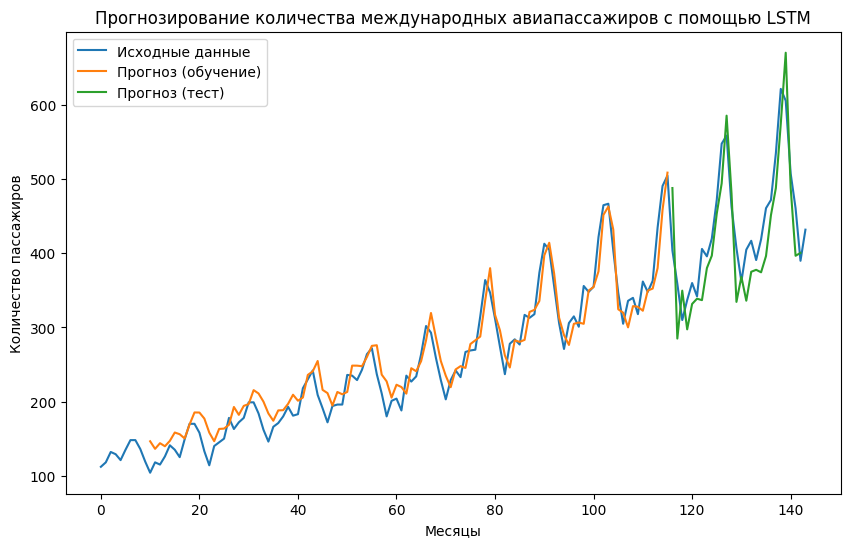

In [3]:
# Шаг 1: Изменение архитектуры модели
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
import requests
import io

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Просмотр первых строк данных
print(data.head())

# Преобразование данных
data = data['Passengers'].values.astype(float)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Создание обучающих и тестовых выборок
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Разделение на обучающие и тестовые данные
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Изменение формы данных для LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# Новая архитектура модели
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(100, return_sequences=True))  # Увеличили число нейронов до 100
model.add(LSTM(75, return_sequences=False))  # Добавлен еще один слой LSTM
model.add(Dense(40))                         # Увеличен размер скрытого слоя
model.add(Dense(20))                         # Добавлен дополнительный скрытый слой
model.add(Dense(1))


# Компиляция и обучение модели
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Предсказание и оценка модели
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Обратное преобразование предсказанных значений к исходной шкале
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')

# Построение прогноза для обучающей выборки
plt.plot(np.arange(time_step, train_size + time_step), train_predict, label='Прогноз (обучение)')

# Построение прогноза для тестовой выборки
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(test_predict)), test_predict, label='Прогноз (тест)')

plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Количество пассажиров')
plt.title('Прогнозирование количества международных авиапассажиров с помощью LSTM')
plt.show()


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - loss: 0.0577 - val_loss: 0.0634
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0085 - val_loss: 0.0480
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0077 - val_loss: 0.0231
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0078 - val_loss: 0.0268
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0056 - val_loss: 0.0236
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0073 - val_loss: 0.0575
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0074 - val_loss: 0.0254
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0076 - val_loss: 0.0233
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0082 - val_loss: 0.0410
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0091 - val_loss: 0.0239
Epoch 11/150
3/3 ━━━

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


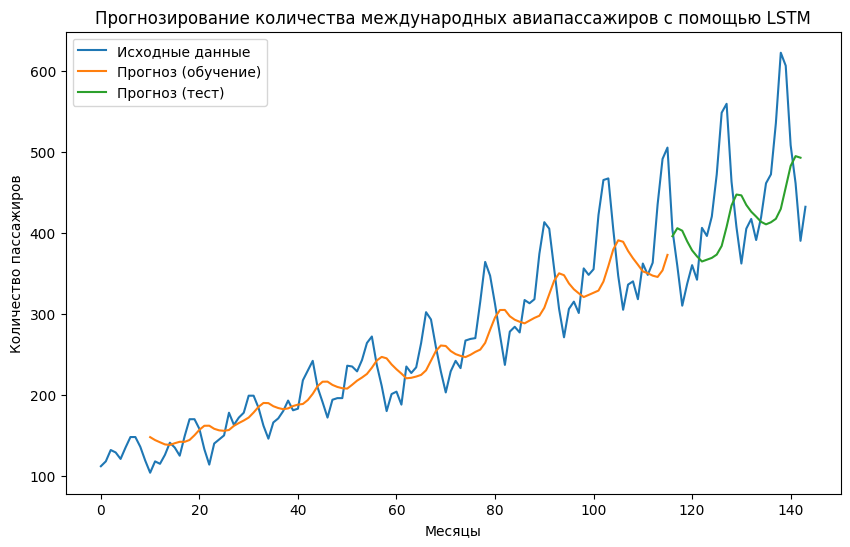

In [4]:
# Шаг 2: Настройка гиперпараметров
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
import requests
import io

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Просмотр первых строк данных
print(data.head())

# Преобразование данных
data = data['Passengers'].values.astype(float)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Создание обучающих и тестовых выборок
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Разделение на обучающие и тестовые данные
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Изменение формы данных для LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# Новая архитектура модели
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(100, return_sequences=True))  # Увеличили число нейронов до 100
model.add(LSTM(75, return_sequences=False))  # Добавлен еще один слой LSTM
model.add(Dense(40))                         # Увеличен размер скрытого слоя
model.add(Dense(20))                         # Добавлен дополнительный скрытый слой
model.add(Dense(1))


# # Компиляция и обучение модели
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train, y_train, batch_size=1, epochs=50)

# Компиляция и обучение модели
model.compile(optimizer='rmsprop', loss='mse')  # Используем RMSProp вместо Adam
model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.15)  # Увеличено количество эпох и уменьшен размер батча


# Предсказание и оценка модели
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Обратное преобразование предсказанных значений к исходной шкале
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')

# Построение прогноза для обучающей выборки
plt.plot(np.arange(time_step, train_size + time_step), train_predict, label='Прогноз (обучение)')

# Построение прогноза для тестовой выборки
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(test_predict)), test_predict, label='Прогноз (тест)')

plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Количество пассажиров')
plt.title('Прогнозирование количества международных авиапассажиров с помощью LSTM')
plt.show()



     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - loss: 0.0377 - val_loss: 0.0456
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0068 - val_loss: 0.0307
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0068 - val_loss: 0.0325
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0079 - val_loss: 0.0225
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0071 - val_loss: 0.0296
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0055 - val_loss: 0.0254
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0053 - val_loss: 0.0314
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0146 - val_loss: 0.0220
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0063 - val_loss: 0.0311
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0055 - val_loss: 0.0232
Epoch 11/150
3/3 ━━━

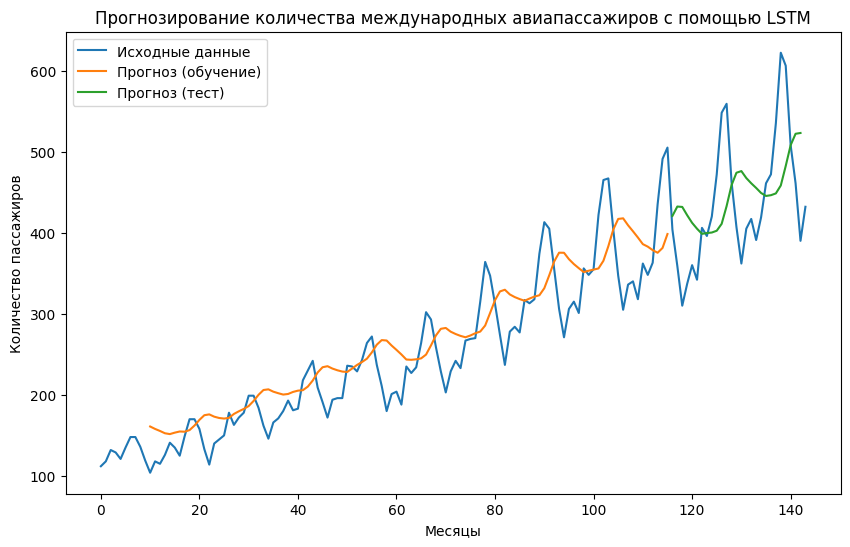

In [15]:
# Шаг 3: Оценка модели с использованием метрик MSE и MAE
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
import requests
import io

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(io.StringIO(requests.get(url).text))

# Просмотр первых строк данных
print(data.head())

# Преобразование данных
data = data['Passengers'].values.astype(float)

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Создание обучающих и тестовых выборок
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_normalized, time_step)

# Разделение на обучающие и тестовые данные
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

# Изменение формы данных для LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# Новая архитектура модели
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(100, return_sequences=True))  # Увеличили число нейронов до 100
model.add(LSTM(75, return_sequences=False))  # Добавлен еще один слой LSTM
model.add(Dense(40))                         # Увеличен размер скрытого слоя
model.add(Dense(20))                         # Добавлен дополнительный скрытый слой
model.add(Dense(1))


# # Компиляция и обучение модели
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train, y_train, batch_size=1, epochs=50)

# Компиляция и обучение модели
model.compile(optimizer='rmsprop', loss='mse')  # Используем RMSProp вместо Adam
model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split=0.15)  # Увеличено количество эпох и уменьшен размер батча


# Предсказание и оценка модели
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Оценка на обучающем наборе
# train_predict = model.predict(X_train)
# train_mse = mean_squared_error(y_train[0], train_predict[:, 0])
# train_mae = mean_absolute_error(y_train[0], train_predict[:, 0])

# # Оценка на тестовом наборе
# test_predict = model.predict(X_test)
# test_mse = mean_squared_error(y_test[0], test_predict[:, 0])
# test_mae = mean_absolute_error(y_test[0], test_predict[:, 0])

# print(f'Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}')
# print(f'Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}')


# Обратное преобразование предсказанных значений к исходной шкале
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data_normalized), label='Исходные данные')

# Построение прогноза для обучающей выборки
plt.plot(np.arange(time_step, train_size + time_step), train_predict, label='Прогноз (обучение)')

# Построение прогноза для тестовой выборки
plt.plot(np.arange(train_size + time_step, train_size + time_step + len(test_predict)), test_predict, label='Прогноз (тест)')

plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Количество пассажиров')
plt.title('Прогнозирование количества международных авиапассажиров с помощью LSTM')
plt.show()



